In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate


In [2]:
train = pd.read_csv("./dataset/Train_data.csv")
test = pd.read_csv("./dataset/Test_data.csv")

In [3]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [6]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [9]:
test.describe(include='object')

,protocol_type,service,flag
count,22544,22544,22544
unique,3,64,11
top,tcp,http,SF
freq,18880,7853,14875


From above 2 code blocks, we can see that we have categorical data in features(X), we need to one hot encode these 

In [10]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

missing values report generator

In [12]:
train.shape

(25192, 42)

In [13]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

nothing printed because we do not have any null values in the dataset. but this snippet maybe helpful in some other dataset

In [14]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


No duplicates. But if we wanted to remove duplicates, we could use the following: train = train.drop_duplicates()

<Axes: xlabel='class', ylabel='count'>

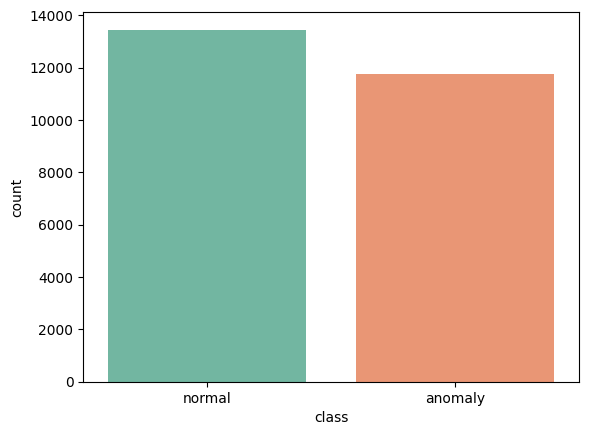

In [15]:
sns.countplot(x='class', hue='class', data=train, palette='Set2')

Dataset seems to have somewhat balanced sets for the 2 classes. The exact value counts can be seen below:

In [16]:
print('Class distribution Training set:')
print(train['class'].value_counts())

Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [17]:
print(train["num_outbound_cmds"].unique())
print(test["num_outbound_cmds"].unique())

[0]
[0]


In [18]:
# this column value is always 0 so lets drop it

train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [19]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


The following code block uses LabelEncoder(), which is great to encode Y, but not X, as the model may think a feature encoded as 2 is more important that another feature encoded as 1 or 0, this makes no sense in categorical data, and we may be building a conceptually incorrect model

In [20]:
# to encode features with string values, but it is a bad idea to encode features, better to one hot encode it
# so we will skip it

# also we cannot encode the train and test separately, it gives inconsistent encodings. THIS IS STRAIGHT UP INCORRECT.

'''
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)'''

"\ndef le(df):\n    for col in df.columns:\n        if df[col].dtype == 'object':\n                label_encoder = LabelEncoder()\n                df[col] = label_encoder.fit_transform(df[col])\n\nle(train)\nle(test)"

Now handling the object data types, encoding the values. 
We create encoders on the values seen on train set and then apply the encoder to the test set as well to maintain consistency. This is the correct way to use LabelEncoder(), but nevertheless we will not use, just keeping the code here.

In [21]:
'''
encoders = {}

def fit_label_encoders(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            encoders[col] = le

def transform_with_encoders(df):
    for col, le in encoders.items():
        if col in df.columns:
            df[col] = le.transform(df[col])

# Fit on train
fit_label_encoders(train)

# Apply same mappings to test
transform_with_encoders(test)
'''

"\nencoders = {}\n\ndef fit_label_encoders(df):\n    for col in df.columns:\n        if df[col].dtype == 'object':\n            le = LabelEncoder()\n            df[col] = le.fit_transform(df[col])\n            encoders[col] = le\n\ndef transform_with_encoders(df):\n    for col, le in encoders.items():\n        if col in df.columns:\n            df[col] = le.transform(df[col])\n\n# Fit on train\nfit_label_encoders(train)\n\n# Apply same mappings to test\ntransform_with_encoders(test)\n"

This gives an error because when we tried to transform test, it saw a new category ('tftp_u' in service) that never appeared in train. 

So lets try one-hot-encoding it instead. 

In [22]:
categorical_cols = train.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('class')  # keep label separate

train_test = pd.concat([train, test], axis=0)  # combining so that we get consistent encodings
train_test = pd.get_dummies(train_test, columns=categorical_cols)

train = train_test.iloc[:len(train)]
test = train_test.iloc[len(train):]

In [23]:
train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


Now lets perpare the train and test splits along with X and Y splits

In [24]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

The following code block uses Redundant Feature Elimination (RFE), to remove unimportant features.
It is up to us to whether use it or not. If we are using Random Forest model, just skip this step, because the RF model does the work of RFE internally.
You should use RFE if the model we will use are linear like Logistic Regression.

Now lets perform feature selection using Recursive Feature Elimination (RFE) with a Random Forest classifier

In [25]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'protocol_type_icmp',
 'flag_SF']

so these are the top 10 features that was selected by the RFE, but i am not happy with the selection, so moving forward with all the features for now, even tho it is computationally not efficient

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
test = scaler.fit_transform(test)

d:\project\Network_Intrusion_Detection\env\lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\project\Network_Intrusion_Detection\env\lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\project\Network_Intrusion_Detection\env\lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


So 'test' is just the unseen data, it does not have a label. The following split will give us the train and validation split from train.csv

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [28]:
import time

First ML model : Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000, solver='saga')
# can explicitly mention the solver as well. 'lbfgs' or 'saga'. 'saga' is better for sparse dataset like ours
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  80.54111695289612


In [30]:
#If the dataset is large and complex (like NSL-KDD after one-hot encoding), the default max_iter=100 is often too small → leads to ConvergenceWarning.

#Setting a very high max_iter ensures the solver has enough time to converge.

In [31]:
start_time = time.time()
y_test_pred = clfl.predict(x_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.0050046443939208984


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# ---- Accuracy ----
lg_train = clfl.score(x_train, y_train)
lg_test = clfl.score(x_test, y_test)
print(f"Training Accuracy: {lg_train:.4f}")
print(f"Test Accuracy: {lg_test:.4f}")

# ---- Detailed evaluation ----
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9741
Test Accuracy: 0.9747

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.98      0.97      0.97      3498
      normal       0.97      0.98      0.98      4060

    accuracy                           0.97      7558
   macro avg       0.98      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558

Confusion Matrix:
[[3380  118]
 [  73 3987]]


We will use optuna, its a great library to optimize hyperparameters.

In [33]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

d:\project\Network_Intrusion_Detection\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Second ML model : KNN

First we write our Optuna Objective function.
search range from 2 to 16, and we search linearly, not exponentially spaced (meaning of log = False)

In [35]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log = False)
    classifier_obj = KNeighborsClassifier(n_neighbors = n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

now we use this optuna objective function to iteratively search the best hyperparameters for maximizing the classification accuracy, and we do this 30 times, we can change the number as we like. and we will use the best out of the 30.

In [36]:
study_KNN = optuna.create_study(direction = 'maximize')
study_KNN.optimize(objective, n_trials = 30)
print(study_KNN.best_trial)

FrozenTrial(number=12, state=TrialState.COMPLETE, values=[0.9935168033871394], datetime_start=datetime.datetime(2025, 10, 31, 19, 44, 53, 720619), datetime_complete=datetime.datetime(2025, 10, 31, 19, 44, 54, 107238), params={'KNN_n_neighbors': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=12, value=None)


In [37]:
# lets use the best parameters to create our model

KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train score: {KNN_train}")
print(f"Train score: {KNN_test}")

Train score: 0.9981853238062833
Train score: 0.9935168033871394


Neat! also we can analyze optuna's results visually:

C:\Users\mahar\AppData\Local\Temp\ipykernel_3676\1327405268.py:3: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study_KNN)
C:\Users\mahar\AppData\Local\Temp\ipykernel_3676\1327405268.py:4: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study_KNN)


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

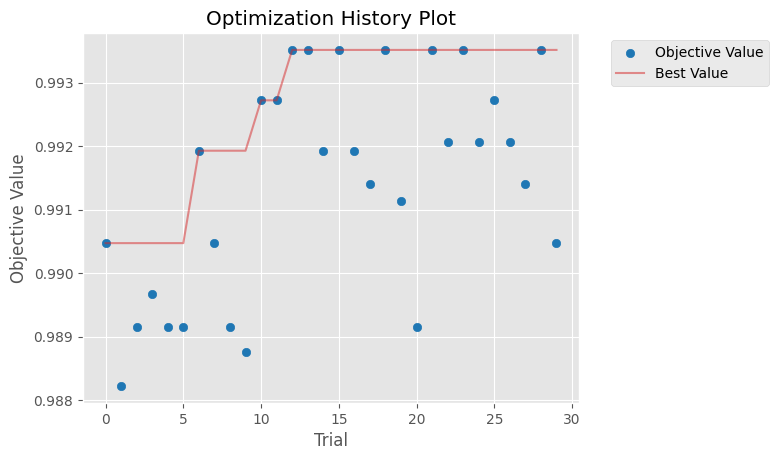

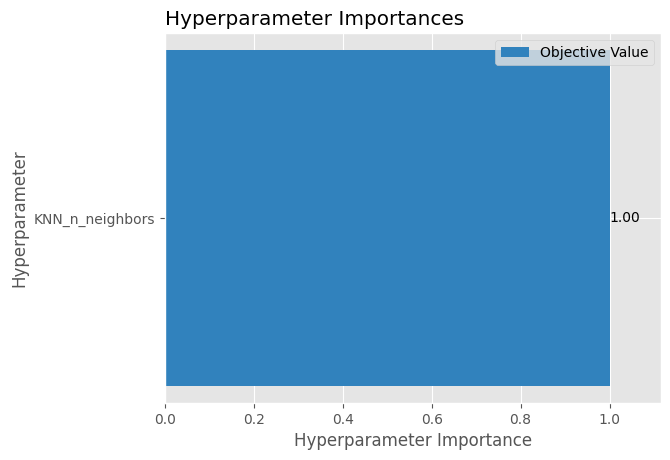

In [41]:
from optuna.visualization.matplotlib import plot_optimization_history, plot_param_importances

plot_optimization_history(study_KNN)
plot_param_importances(study_KNN)

Third model: Decision Tree

so we can split based on entropy aka "information gain" or the default 'gini'. We will use Optuna to decide which to use. we will also decide on the depth of the tree using optuna as well

In [49]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log = False)
    dt_criterion = trial.suggest_categorical('dt_criterion', ['gini', 'entropy'])
    classifier_obj = DecisionTreeClassifier(criterion=dt_criterion, max_depth=dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [50]:
study_dt = optuna.create_study(direction = 'maximize')
study_dt.optimize(objective, n_trials = 30)
print(study_dt.best_trial)

FrozenTrial(number=9, state=TrialState.COMPLETE, values=[0.9970891770309606], datetime_start=datetime.datetime(2025, 10, 31, 20, 10, 25, 353381), datetime_complete=datetime.datetime(2025, 10, 31, 20, 10, 25, 509481), params={'dt_max_depth': 32, 'dt_criterion': 'entropy'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, trial_id=9, value=None)


In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= study_dt.best_trial.params['dt_criterion'], 
                            max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train = dt.score(x_train, y_train)
dt_test = dt.score(x_test, y_test)

print(f"Train score: {dt_train}")
print(f"Test score: {dt_test}")

Train score: 1.0
Test score: 0.9966922466260916


Finall summary and cross comparision of the models used

In [63]:
data = [["KNN", KNN_train, KNN_test],
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]

print(tabulate(data, headers = col_names, tablefmt='fancy_grid'))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.998185 │     0.993517 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.974084 │     0.974729 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.996692 │
╘═════════════════════╧═══════════════╧══════════════╛


Other visualizations for this train and test scores

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# our trained models
models = {
    "KNN": KNN_model,
    "Logistic Regression": clfl,
    "Decision Tree": dt
}

In [65]:
# dictionaries to store metrics
precision_dict = {}
recall_dict = {}
f1_dict = {}
conf_matrices = {}

# now lets predict on test set and calculate the metrics
for name, model in models.items():
    y_pred = model.predict(x_test)
    
    precision_dict[name] = precision_score(y_test, y_pred, pos_label='anomaly')
    recall_dict[name] = recall_score(y_test, y_pred, pos_label='anomaly')
    f1_dict[name] = f1_score(y_test, y_pred, pos_label='anomaly')
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    
    print(f"\n{'='*20} {name} {'='*20}")
    print("Confusion Matrix:\n", conf_matrices[name])
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['normal','anomaly']))


==================== KNN ====================
Confusion Matrix:
 [[3482   16]
 [  33 4027]]

Classification Report:
               precision    recall  f1-score   support

      normal       0.99      1.00      0.99      3498
     anomaly       1.00      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558


==================== Logistic Regression ====================
Confusion Matrix:
 [[3380  118]
 [  73 3987]]

Classification Report:
               precision    recall  f1-score   support

      normal       0.98      0.97      0.97      3498
     anomaly       0.97      0.98      0.98      4060

    accuracy                           0.97      7558
   macro avg       0.98      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558


==================== Decision Tree ====================
Confusion Matrix:
 [[3485   13]
 [  1

What the confusion matrix shows:

[[TN      FP]

[FN      TP]]

Positives: Anomalies; Negatives: Normal. 

Precision = TP / (TP+FP) when the model says it is an anomaly, how trushworthy is it?

Recall = TP / (TP + FN) out of all the anomalies, how many did the model actually find?

F1 score is just he harmonic mean between Precision and Recall. 

Accuracy = (TP + TN) / (TP + FP + TN + FN)

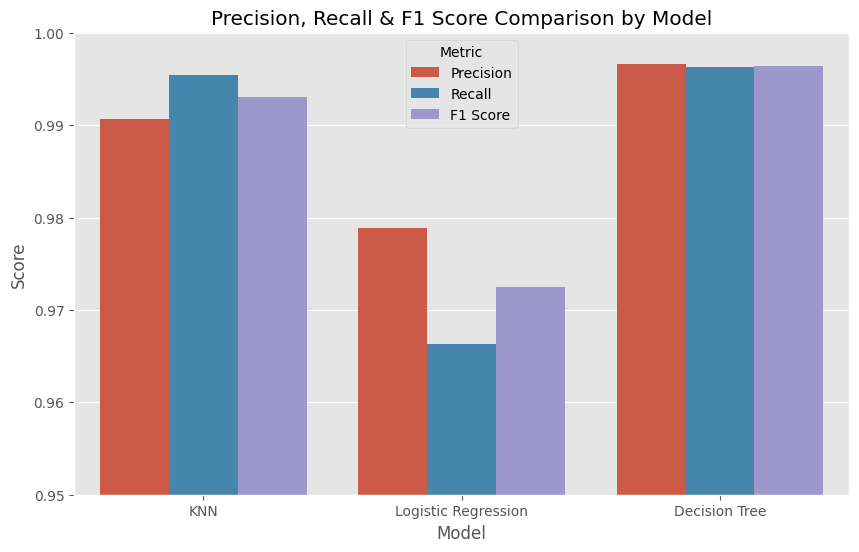

In [71]:
# lets plot the precision and recall values of the models

metrics_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Precision": list(precision_dict.values()),
    "Recall": list(recall_dict.values()),
    "F1 Score": list(f1_dict.values())
})

# reshaping for grouped plotting
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# plotting grouped bar chart by Model
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_melted)
plt.title("Precision, Recall & F1 Score Comparison by Model")
plt.ylim(0.95,1.0)
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()

We can see that KNN performs excellently. very precise, FP = 16 : rarely flags normal as anomaly. Also very sensitive, catches almost all anomalies, FN = 33. 

The Logistic Regression model performs worst, because it is a linear model and it cannot capture some non linear points.

The Decision tree performs the best, optimal so to speak. There is always a fear or overfitting, but looking at the performance on test set, it performs well as well. 